# Computational Cognition

### Rescorla-Wagner Model Exercises

Taken from UC Berkeley's CogSci C131 - Computational Methods for Cognition, Problem Set 1

## Rescorla-Wagner Model

*From Wikipedia:*

The **Rescorla-Wagner model** is a model of classical conditioning, in which learning is conceptualized in terms of associations between conditioned (CS) and unconditioned (US) stimuli. 

- A strong CS-US association means CS signals/predicts US

**Basic Assumptions of Model**
1. The change in the association between a CS and a US that occurs when the two are paired depends on how strongly the US is predicted on that trial - that is, informally, how "surprised" the organism is by the US. The amount of this "surprise" depends on the summed associative strength of all cues present during that trial. In contrast, previous models derived the change in associative strength from the current value of the CS alone.

2. The associative strength of a CS is represented by a single number. The association is excitatory if the number is positive, inhibitory if it is negative.

3. The associative strength of a stimulus is expressed directly by the behavior it elicits/inhibits.

4. The salience of a CS (alpha in the equation) and the strength of the US (beta) are constants and do not change during training.

5. Only the current associative strength of a cue determines its effect on behavior and the amount of learning it supports. It does not matter how that strength value was arrived at, whether by simple conditioning, reconditioning, or otherwise.


**Model Equation**

$ \Delta V^{n+1}_X = \alpha_X \beta (\lambda - V_{tot}) $ 

and 

$ {\displaystyle V_{X}^{n+1}=V_{X}^{n}+\Delta V_{X}^{n+1}}$

where

- ${\displaystyle \Delta V_{X}}$ is the change in the strength, on a single trial, of the association between the CS labelled "X" and the US
- ${\displaystyle \alpha }$  is the salience of X (bounded by 0 and 1)
- ${\displaystyle \beta }$  is the rate parameter for the US (bounded by 0 and 1), sometimes called its association value
- ${\displaystyle \lambda }$  is the maximum conditioning possible for the US
- ${\displaystyle V_{X}}$ is the current associative strength of X
- ${\displaystyle V_{tot}}$ is the total associative strength of all stimuli present, that is, X plus any others

## 1a

Suppose that we repeatedly pair a light with food. Plot the association strength between light and food according to the Rescorla-Wagner model for λ=1.0, α=0.75, β=0.1 for an initial association of 0.05 and for 0.5. Plot 20 trials.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

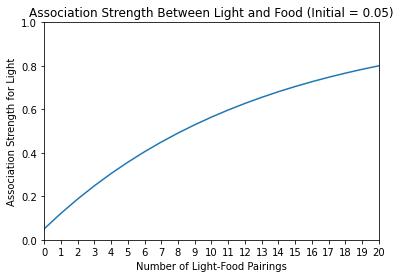

In [2]:
# For initial association of 0.05 

def Vx(alpha, beta, lambdah, initial):
    delta_Vx = alpha * beta * (lambdah - initial)
    return initial + delta_Vx 

def trials_agg(alpha, beta, lambdah, initial, num_trials):
    index = 1
    associations = [initial]
    while index < num_trials:
        next = Vx(alpha, beta, lambdah, initial)
        initial = next
        associations.append(initial)
        index += 1
    return associations


x = list(range(0, 21))
y = list(trials_agg(0.75, 0.1, 1.0, 0.05, 21))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 20)
ax.set_ylim(0, 1)
plt.plot(x, y)

plt.xlabel('Number of Light-Food Pairings')
plt.ylabel('Association Strength for Light')
plt.title('Association Strength Between Light and Food (Initial = 0.05)')

ax.xaxis.set(ticks = range(0, 21))

plt.show()

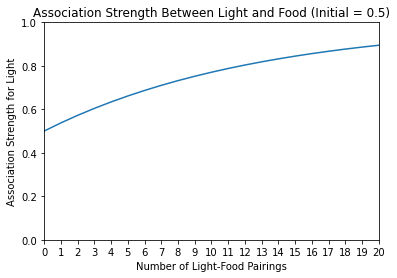

In [3]:
# For initial association of 0.5 

def Vx(alpha, beta, lambdah, initial):
    delta_Vx = alpha * beta * (lambdah - initial)
    return initial + delta_Vx

def trials_agg(alpha, beta, lambdah, initial, num_trials):
    index = 1
    associations = [initial]
    while index < num_trials:
        next = Vx(alpha, beta, lambdah, initial)
        initial = next
        associations.append(initial)
        index += 1 
    return associations


x = list(range(0, 21))
y = list(trials_agg(0.75, 0.1, 1.0, 0.5, 21))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0, 20)
ax.set_ylim(0, 1)
plt.plot(x, y)

plt.xlabel('Number of Light-Food Pairings')
plt.ylabel('Association Strength for Light')
plt.title('Association Strength Between Light and Food (Initial = 0.5)')

ax.xaxis.set(ticks = range(0, 21))

plt.show()

## 1b

How many trials will it take to reach Vlight=0.8 if the initial association is 0.05?

In [4]:
max_trials = 25
y = pd.Series(list(trials_agg(0.75, 0.1, 1.0, 0.05, max_trials)))

trials = []
for i in range(0, max_trials):
    if y[i] >= 0.8:
        trials.append(i)
        
num_trials_required = trials[0]
num_trials_required

print("It takes 20 trials to reach Vlight = 0.8 with initial = 0.05.")

It takes 20 trials to reach Vlight = 0.8 with initial = 0.05.


## 1c

Suppose, with λ=1.0, β=0.1, that it takes a 13 trials for a bell's association with food to 
exceed 0.8. What is the salience? Show your work/code (it is acceptable to solve numerically).

In [5]:
max_trials = 14
y = pd.Series(list(trials_agg(1.17, 0.1, 1.0, 0, 14)))

print("Through trial & error, the salience, alpha, is 1.17.")

Through trial & error, the salience, alpha, is 1.17.


#### Additional Exercise
How do we calculate the salience from above without using numerical trial and error?

## 2
Suppose that you begin with an association of a light and food of 0.8. Now, you want to teach
a new association between a bell and food, while the light is present (thus you pair light, food, bell all 
together). Plot the association strength between bell and food as a function of the number of trials.


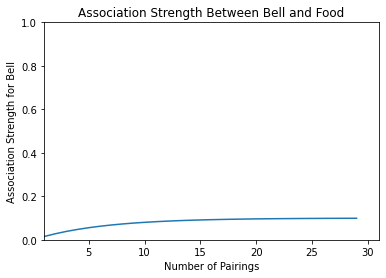

In [6]:
def Vx_new_association(alpha, beta, lambdah, a, x):
    total_association_strength = a + x
    change_Vx = alpha * beta * (lambdah - (total_association_strength))
    return a + change_Vx

def trials_agg(alpha, beta, lambdah, a, x, num_trials):
    index = 1
    associations = [(a, x)]
    while index < num_trials:
        new_a = Vx_new_association(alpha, beta, lambdah, a, x)
        new_x = Vx_new_association(alpha, beta, lambdah, x, a)
        associations.append((new_a, new_x))
        a = new_a
        x = new_x
        index += 1 
    return associations


x = list(range(0, 30))
y = [y for (x, y) in trials_agg(0.75, 0.1, 1, 0.8, 0, 30)]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(1, 31)
ax.set_ylim(0, 1)
plt.plot(x, y)

plt.xlabel('Number of Pairings')
plt.ylabel('Association Strength for Bell')
plt.title('Association Strength Between Bell and Food')

plt.show()

## 3a
Suppose you repeatedly alternate trials, pairing a bell and food and a bell and no food. If 
you do this for a long time, what will the association strength be if λ=1.0. Make a plot of what happens 
and provide an intuitive explanation for why.

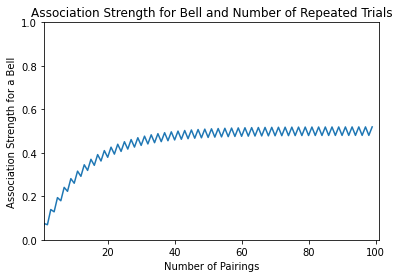

In [8]:
def Vx(alpha, beta, lambdah, initial):
    delta_Vx = alpha * beta * (lambdah - initial)
    return initial + delta_Vx

def Vex(alpha, beta, lambdah, x):
    delta_Vx = alpha * beta * (-x)
    return x + delta_Vx

def l_e_trials_agg(alpha, beta, lambdah, initial, num_trials):
    index = 1
    associations = [initial]
    while index < num_trials:
        if index % 2 == 1:
            initial = Vx(alpha, beta, lambdah, initial)
        else:
            initial = Vex(alpha, beta, lambdah, initial)
        associations.append(initial)
        index += 1 
    return associations

x = list(range(0, 100))
y = list(l_e_trials_agg(0.75, 0.1, 1, 0, 100))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(1, 101)
ax.set_ylim(0, 1)
plt.plot(x, y)

plt.xlabel('Number of Pairings')
plt.ylabel('Association Strength for a Bell')
plt.title('Association Strength for Bell and Number of Repeated Trials')

plt.show()

As the number of trials increases, the association strength increases and then plateus around a strength of 0.5. This is because the learning and extinction formulas neutralize/cancel out. 

## 3b
Suppose that, on a given trial, with probability P you pair a bell with food, and with 
probability 1-P you pair a bell with no food. What will the association strength be after many trials of 
this, if you assume λ=1.0? Plot some examples. Provide a short intuitive explanation on Marr's 
computational level.

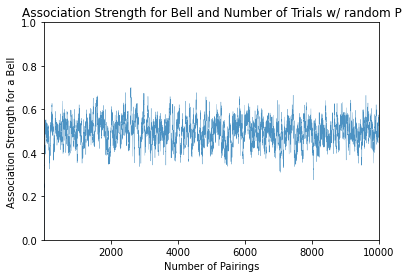

In [9]:
def VxVex(alpha, beta, lambdah, initial, p):
    delta_VxVex = p * alpha * beta * (lambdah - initial) + (1-p) * alpha * beta * (-initial)
    return initial + delta_VxVex

def trials_agg_with_random_p(alpha, beta, lambdah, initial, num_trials):
    index = 1
    associations = [initial]

    while index < num_trials:
        p = random.random()
        result = VxVex(alpha, beta, lambdah, initial, p)
        initial = result
        associations.append(initial)
        index += 1 
    return associations

x = list(range(0, 10000))
y = list(trials_agg_with_random_p(0.75, 0.1, 1, 0, 10000))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(1, 10000)
ax.set_ylim(0, 1)
plt.plot(x, y, alpha=0.8, linewidth=0.3)
plt.xlabel('Number of Pairings')
plt.ylabel('Association Strength for a Bell')
plt.title('Association Strength for Bell and Number of Trials w/ random P')

plt.show()

The association strength given many trials oscillates around 0.5. This is because the average of the probability of pairing bell with food and bell with no food is 0.5.

## 4
In the Rescorla-Wagner model, salience plays essentially the same role as learning rate. In a 
sentence or two, describe why, psychologically, we think there are different factors here. In a sentence 
or two, describe an experiment that would let you disentangle salience and learning rate.